## Tests on simple version of CASE without tuning algorithm

In [1]:
import numpy as np
from scipy.stats import beta
from graspologic.embed import CovariateAssistedEmbedding as CASE
from graspologic.simulations import sbm

from graspologic.plot import pairplot, heatmap
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload

### Make data

In [2]:
def make_community(a, b, N=1500):
    return beta.rvs(a, b, size=(N//3, 30))

def gen_covariates(N=1500):
    c1 = make_community(2, 5)
    c2 = make_community(2, 2)
    c3 = make_community(2, 2)

    covariates = np.vstack((c1, c2, c3))
    return covariates

# Generate covariates
N = 1500
X = gen_covariates(N=N)

# Generate SBM
n = N // 3
p, q = .3, .15
B = np.array([[.3, .3, .15],
              [.3, .3, .15],
              [.15, .15, .3]])

A, labels = sbm([n, n, n], B, return_labels = True)

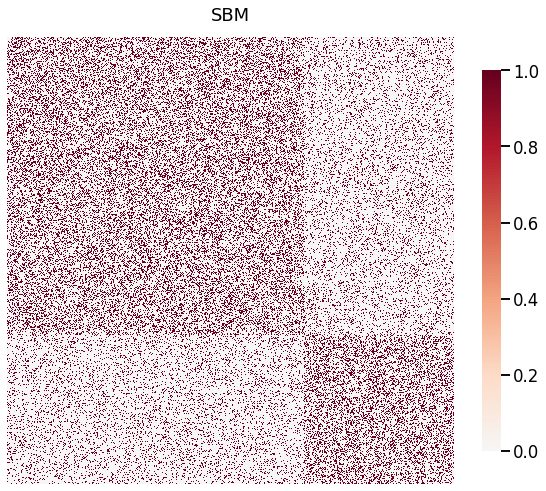

In [3]:
heatmap(A, title="SBM");

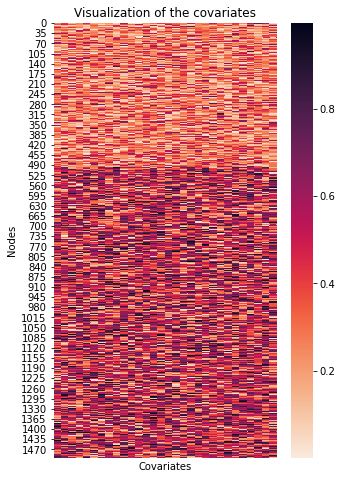

In [4]:
fig, ax = plt.subplots(figsize=(5, 8))
ax = sns.heatmap(X, ax=ax, cmap="rocket_r")
ax.set(title="Visualization of the covariates", xticks=[], 
       ylabel="Nodes",
       xlabel="Covariates");

### Test embedding algs work

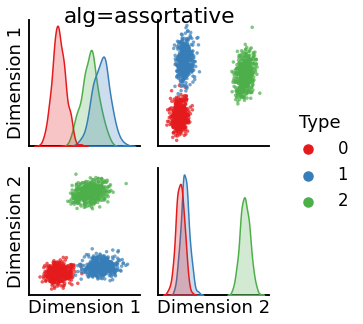

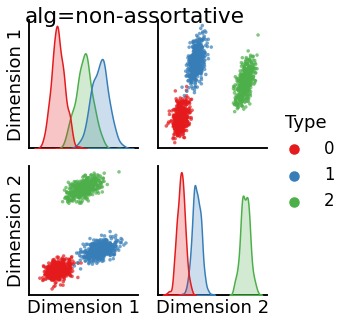

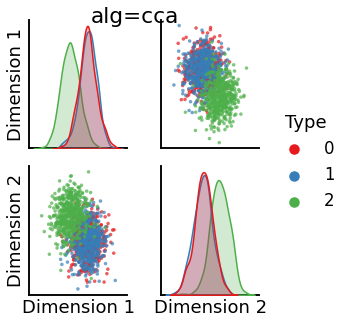

In [16]:
embedding_algs = ["assortative", "non-assortative", "cca"]

def case_embed(A, X, alg="assortative", alpha=None):
    case = CASE(n_components=2, embedding_alg=alg, alpha=alpha)
    latents = case.fit_transform(A, covariates=X)
    return latents

for alg in embedding_algs:
    latents = case_embed(A, X, alg=alg)
    pairplot(latents, labels=labels, title=f"alg={alg}")

### Test to make sure custom alpha values work

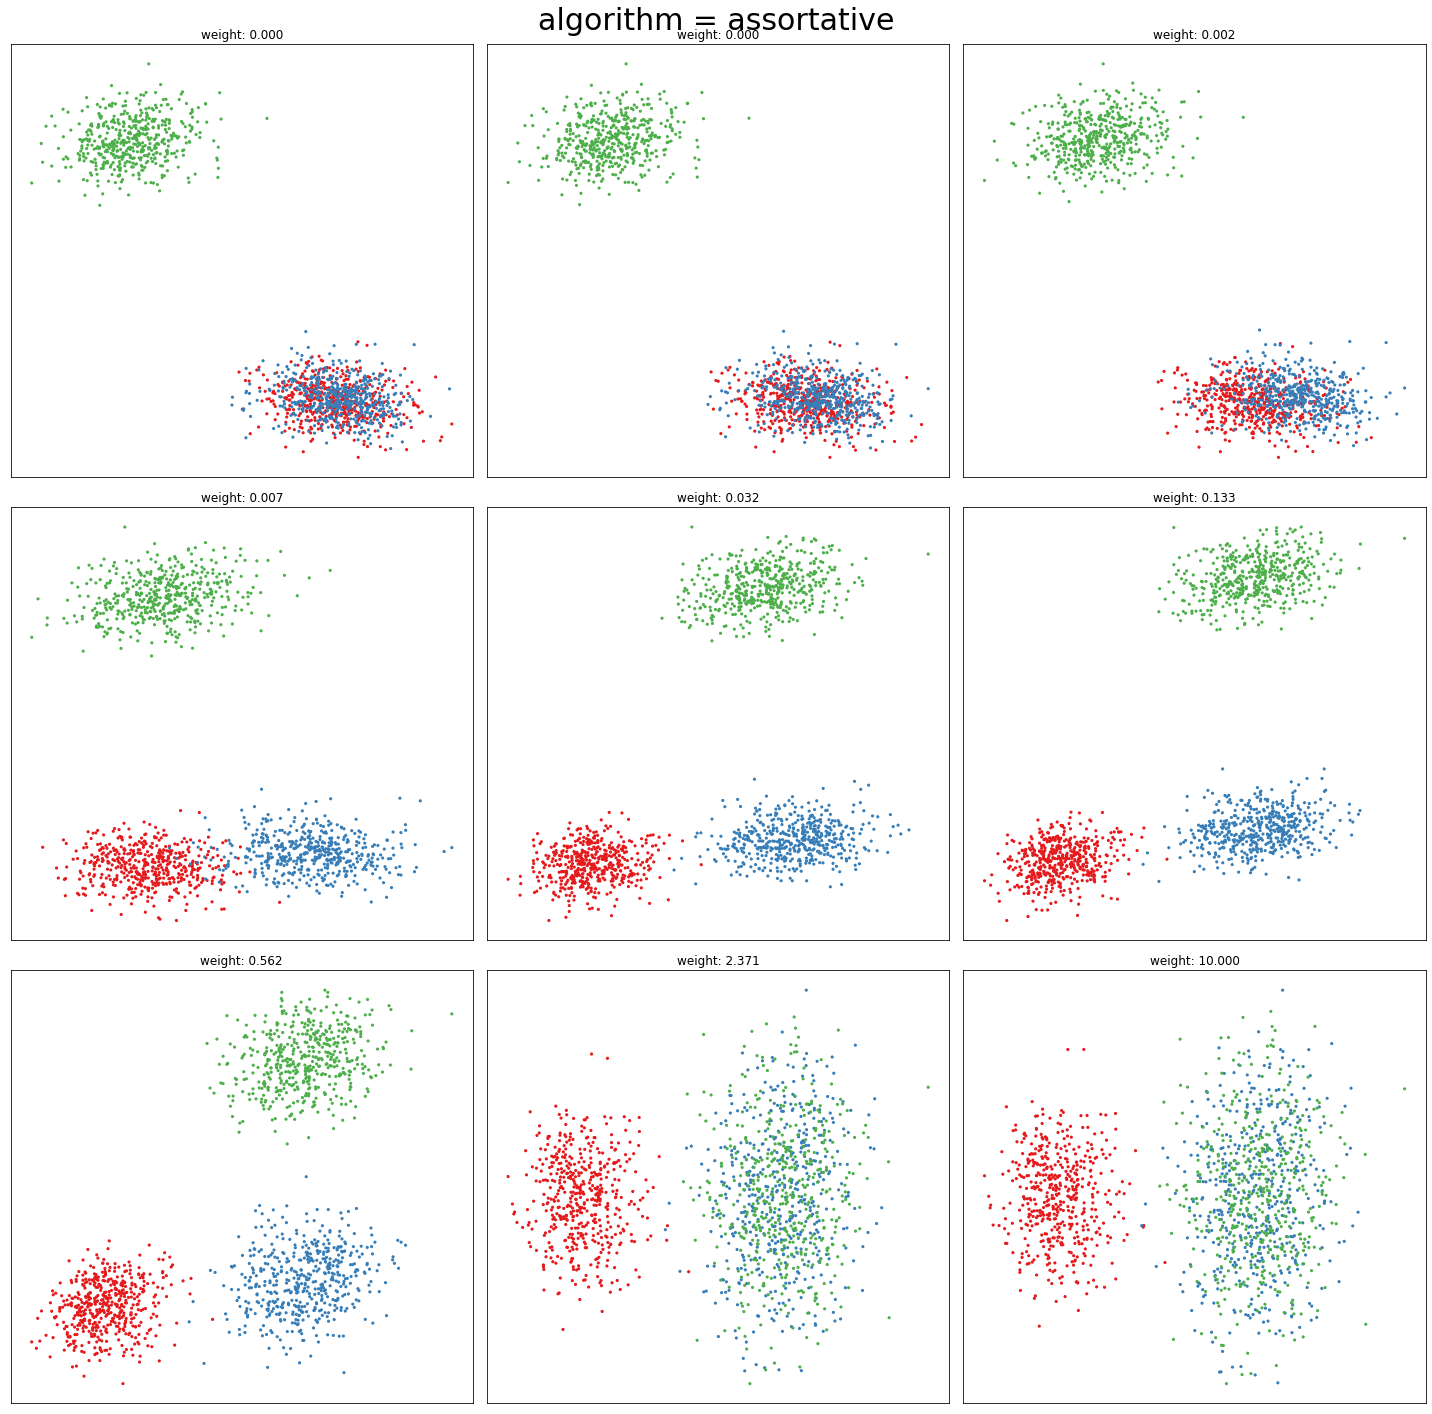

In [14]:
import warnings
warnings.filterwarnings("ignore")

def plot_latents(latent_positions, *, title, labels, ax=None):
    if ax is None:
        ax = plt.gca()
    plot = sns.scatterplot(latent_positions[:, 0], latent_positions[:, 1], hue=labels, 
                           linewidth=0, s=10, ax=ax, palette="Set1")
    plot.set_title(title, wrap=True);
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.legend(loc="upper right", title="Community")
    
    return plot

def plot_weights(A, X, *, alg, labels):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    for a, ax in zip(np.geomspace(10e-5, 10, num=9), axs.flat):
        case = CASE(n_components=2, embedding_alg=alg, alpha=a)
        l_ = case.fit_transform(A, covariates=X)
        plot_latents(l_, title=f"weight: {a:.3f}", labels=labels, ax=ax)
        ax.get_legend().remove()
    fig.suptitle(f"algorithm = {alg}", size=30)
    plt.tight_layout()

plot_weights(A, X, alg="assortative", labels=labels)

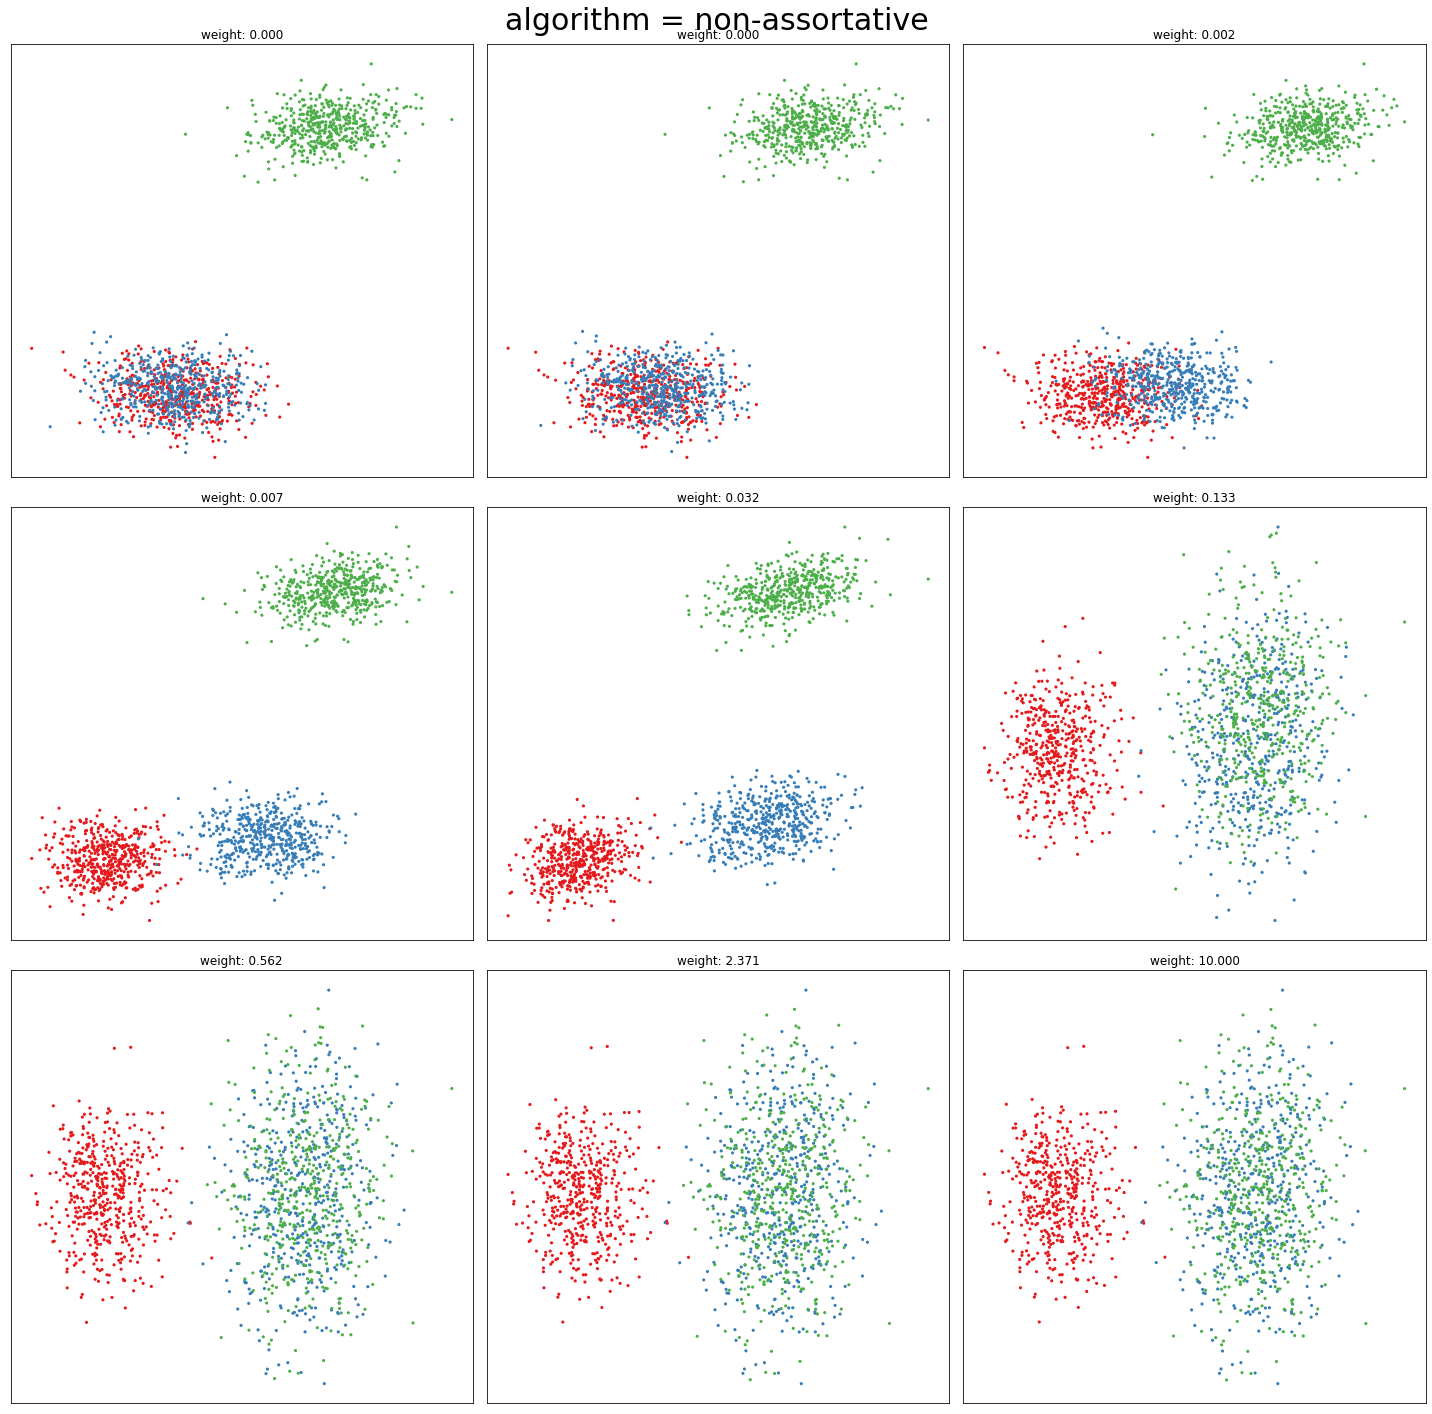

In [17]:
# generate non-assortative SBM
n = N // 3
q, p = .3, .15
B = np.array([[p, p, q],
              [p, p, q],
              [q, q, p]])

A, labels = sbm([n, n, n], B, return_labels = True)

plot_weights(A, X, alg="non-assortative", labels=labels)